In [1]:
# IMPORT PANDAS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# READ THE CSV FILE
df = pd.read_csv("WHO-COVID-19-global-data.csv") # READ THE DATASET
df = pd.DataFrame(df)

In [12]:
# WORKING ON KUWAIT
df_countries = df.groupby(df["Country"])

#KUWAIT
df_kwt = df_countries.get_group("Kuwait")
df_kwt = df_kwt.reset_index(drop = True)
df_kwt = df_kwt['Cumulative_cases']
df_kwt = pd.DataFrame(df_kwt)

In [13]:
#NORMALIZATION

pop_k = 4271000

df_kwt["Cumulative_cases_norm"] = df_kwt["Cumulative_cases"]/pop_k

In [14]:
kt = df_kwt

In [15]:
i = 0
while i < 97:
    kt = kt.drop(kt.index[0])
    i = i + 1

kt = kt.reset_index(drop = True)

In [16]:
kt["Cumulative_cases_norm"] = kt["Cumulative_cases"]/pop_k

kt["log"] = np.log(kt["Cumulative_cases_norm"])

# KUWAIT

**log P = c + rt -------------------1**

The first exponential of the exponential of the First wave of Kuwait is 0-30 (in days).

Now from the graphs in the previous codes, we know that

c = -8.52118
t = 30 (duration of the exponential)

log(P) = -6.38441 (from the log return graph at t = 30)

From 1,

-6.38441 = -8.52118 + 30.r

r = (-6.38441 + 8.52118)/30

r = 0.07122

In [17]:
r = 0.07122
from scipy.integrate import odeint

# Total population, n
n = pop_k
# Initial number of infected and recovered individuals, i_0 and r_0
i_0 = kt["Cumulative_cases_norm"][0]
r_0 = 0

# beginning of the period s_0
s_0 = 1 - i_0 - r_0

In [18]:
# Assuming that people tend to recover within 10 days
b = 0.1
a = r + b

In [19]:
t = np.linspace(0, 30, 30)
# The SIR model differential equations.
def deriv(y, t, a, b):
    S, I, R = y
    dSdt = - a * S * I
    dIdt = a * (S * I) - (b * I)
    dRdt = b * I
    return dSdt, dIdt, dRdt

y0 = s_0, i_0, r_0
ret = odeint(deriv, y0, t, args=(a, b))
S, I, R = ret.T

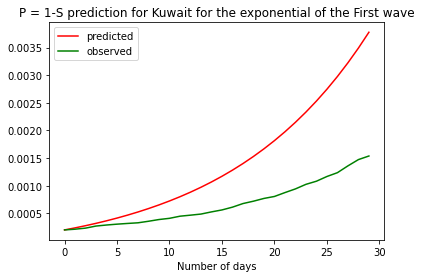

In [20]:
s = pd.DataFrame()
s["s"] = S
s["pred"] = 1 - s["s"]
s["pred"].plot(c = 'red', label = 'predicted')
kt['Cumulative_cases_norm'][:30].plot(c = 'green', label = 'observed')
plt.title("P = 1-S prediction for Kuwait for the exponential of the First wave")
plt.xlabel("Number of days")
plt.legend()
plt.show()